In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rc('font', size = 17)
plt.rc('axes', titlesize = 17)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('legend', fontsize = 14)

    
%matplotlib inline
import gym
import gym_inventory
from tqdm import tqdm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False)

# Agent 생성

In [2]:
# tmp = np.triu(np.ones((100, 100)),1)[::-1]
# tmp[tmp == 1] = -999999
# tmp

In [3]:
class Agent :
    '''에이전트'''
    
    def __init__(self, num_states, num_actions) :
        self.brain = Brain(num_states, num_actions) # 에이전트의 행동을 결정하는 두뇌 
        
    def update_Q_function(self, observation, action, reward, observation_next)  :
        '''Q함수 수정'''
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step) :
        '''행동 결정'''
        action = self.brain.decide_action(observation, step)
        return action

In [4]:
class Brain :
    '''에이전트의 두뇌 역할을 하는 클래스, Q-learning을 실제로 수행'''
    
    def __init__(self, num_states, num_actions) :
        self.num_actions = num_actions # 행동의 가짓수를 구함
        
        # Q-table 생성
#        self.q_table = np.zeros((num_states, num_actions))
        self.q_table = np.triu(np.ones((num_states, num_actions)),1)[::-1]
        self.q_table[self.q_table == 1] = -999999
#         self.q_table = np.random.uniform(low=0, high=1, size=(num_states, num_actions))
        print(self.q_table.shape)
        
        
        
        
    def update_Q_table(self, observation, action, reward, observation_next) :
        '''Q-learning으로 Q-table을 수정'''
        state = observation
        state_next = observation_next
        Max_Q_next = max(self.q_table[state_next][:])
        
        self.q_table[state, action] = self.q_table[state, action] + \
        ETA*(reward + GAMMA*Max_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode) :
        '''e-greedy 알고리즘을 적용해 서서히 최적행동의 비중을 늘림'''
        state = observation
        epsilon = 2 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1) :
            action = np.argmax(self.q_table[state][:])
        else :
            action = np.random.choice(self.num_actions)
            
        return action

# Environment 생성

In [5]:
class Environment :
    '''Inventory Env를 실행하는 환경 역할을 하는 클래스'''
    
    def __init__(self) :
        self.env = gym.make(ENV) # 실행할 태스크를 설정
        num_states = self.env.observation_space.n
        num_actions = self.env.action_space.n
        self.agent = Agent(num_states, num_actions) # 에이전트 객체를 생성
        
    def train(self) :
        '''실행'''

        rewards_sum_list = []
        rewards_avg_list = []
        
        for episode in tqdm(range(NUM_EPISODES)) : # 에피소드만큼 반복
            observation = self.env.reset() # 환경 초기화

            rewards_list = []
            
            for step in range(MAX_STEPS) : # 1 에피소드에 해당하는 반복
                
                # 행동을 선택
                action = self.agent.get_action(observation, episode)
                
                # 행동 a_t를 실행해 s_{t+1}, r_{t+1}을 계산
                observation_next, reward, done, _ = self.env.step(action) # reward, info는 사용하지 않으므로 _ 처리
                
                # 다음 단계의 상태 observation_next로 Q함수를 수정
                self.agent.update_Q_function(observation, action, reward, observation_next)
                
                # 다음 단계 상태 관측
                observation = observation_next
                
                # 에피소드 마무리
                if done :
                    print('{0} Episode: Finished after {1} time steps'.format(episode, step + 1))
                    break
                rewards_list.append(reward)
            rewards_sum_list.append(np.sum(rewards_list)) 
            rewards_avg_list.append(np.mean(rewards_list))
        return rewards_sum_list, rewards_avg_list

        
    def test(self) :
        observation = self.env.reset() # 환경 초기화
        
        IP_list = []
        demand_list = []
        action_list = []
        reward_list = []
        
        for step in range(MAX_STEPS) :
            
            # 행동을 선택
            action = self.agent.get_action(observation, 99999999999)

            # 행동 a_t를 실행해 s_{t+1}, r_{t+1}을 계산
            observation_next, reward, _, demand = self.env.step(action) # reward, info는 사용하지 않으므로 _ 처리
            
            IP_list.append(observation)
            demand_list.append(demand)
            action_list.append(action)
            reward_list.append(reward)
            
            # 다음 단계 상태 관측
            observation = observation_next
        return IP_list, demand_list, action_list, reward_list

# 학습

In [6]:
ENV = 'Inventory-v0'
inventory = Environment()

(100, 100)


In [7]:
inventory.agent.brain.q_table

array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0., -999999.],
       [      0.,       0.,       0., ...,       0., -999999., -999999.],
       ...,
       [      0.,       0.,       0., ..., -999999., -999999., -999999.],
       [      0.,       0., -999999., ..., -999999., -999999., -999999.],
       [      0., -999999., -999999., ..., -999999., -999999., -999999.]])

In [8]:
GAMMA = 0.9 # 시간할인율
ETA = 0.3 # 학습률
MAX_STEPS = 365 # 1에피소드당 최대 단계 수
NUM_EPISODES = 300 # 최대 에피소드 수

In [9]:
rewards_sum_list, rewards_avg_list = inventory.train()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:03<00:00, 78.41it/s]


In [10]:
inventory.agent.brain.q_table[30]

array([ 0.00000000e+00, -1.29602420e+03, -6.12081791e+02, -1.97616435e+03,
        0.00000000e+00,  0.00000000e+00, -2.89685548e+01,  0.00000000e+00,
        0.00000000e+00, -8.60076201e+02,  0.00000000e+00, -5.94060799e+02,
       -1.04124622e+03, -7.44430857e+02,  0.00000000e+00,  0.00000000e+00,
       -3.23228620e+02, -2.26647478e+02,  0.00000000e+00,  0.00000000e+00,
        1.30209967e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.69779156e+01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.61415198e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.15994720e+02, -1.08635280e+02,  0.00000000e+00,
        0.00000000e+00,  2.75228094e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.08472659e+02,  2.07132823e+02,
        3.36527006e+02,  3.70618534e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

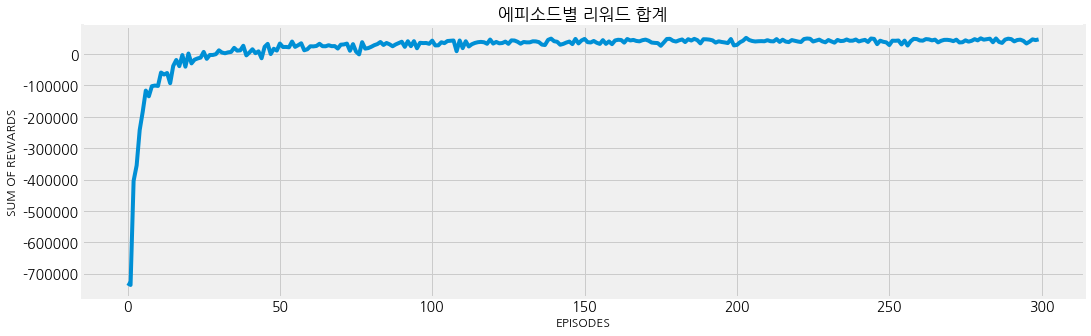

In [11]:
plt.rcParams["figure.figsize"] = (16,5)

fig, ax = plt.subplots()
ax.plot([num for num in range(NUM_EPISODES)], rewards_sum_list)

ax.set_xlabel('EPISODES')
ax.set_ylabel('SUM OF REWARDS')
ax.grid(True)
ax.set_title('에피소드별 리워드 합계')

plt.show()

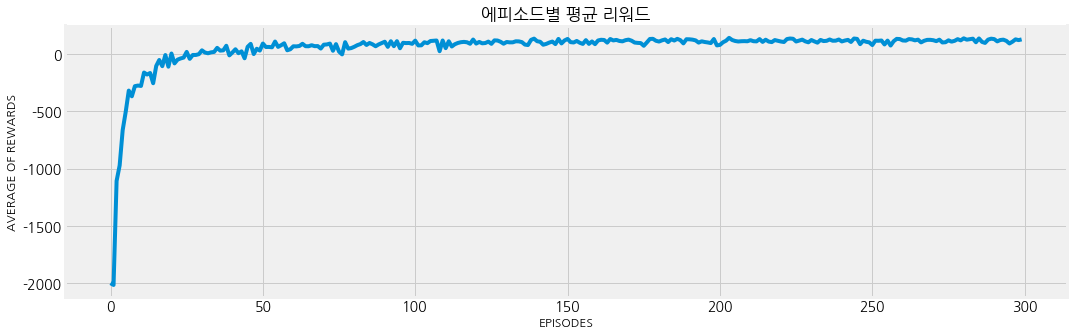

In [12]:
plt.rcParams["figure.figsize"] = (16,5)

fig, ax = plt.subplots()
ax.plot([num for num in range(NUM_EPISODES)], rewards_avg_list)

ax.set_xlabel('EPISODES')
ax.set_ylabel('AVERAGE OF REWARDS')
ax.grid(True)
ax.set_title('에피소드별 평균 리워드')

plt.show()

# 테스트

In [13]:
IP_list, demand_list, action_list, reward_list = inventory.test()

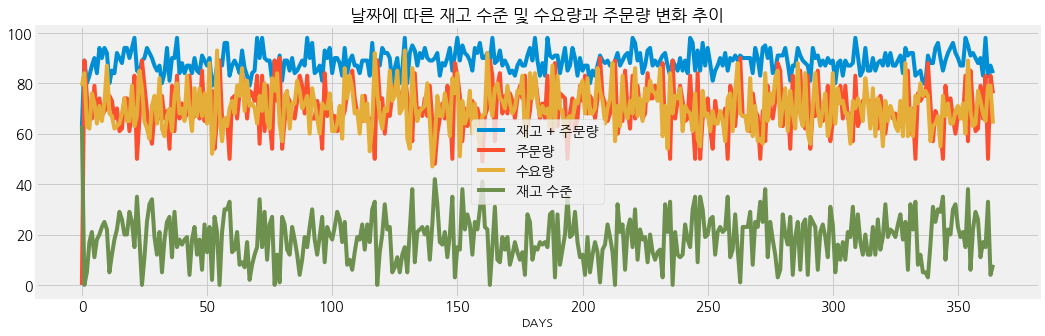

In [14]:
plt.rcParams["figure.figsize"] = (16,5)

fig, ax = plt.subplots()
ax.plot([num for num in range(MAX_STEPS)], [sum(i) for i in zip(IP_list, action_list)], label="재고 + 주문량")
ax.plot([num for num in range(MAX_STEPS)], action_list, label="주문량")
ax.plot([num for num in range(MAX_STEPS)], demand_list, label="수요량")
ax.plot([num for num in range(MAX_STEPS)], IP_list, label="재고 수준")

ax.set_xlabel('DAYS')
ax.grid(True)
ax.set_title('날짜에 따른 재고 수준 및 수요량과 주문량 변화 추이')
ax.legend()

plt.show()

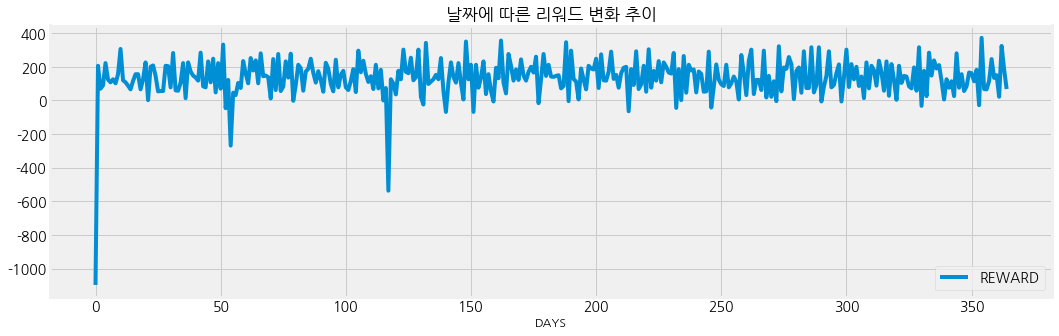

In [15]:
plt.rcParams["figure.figsize"] = (16,5)

fig, ax = plt.subplots()
ax.plot([num for num in range(MAX_STEPS)], reward_list, label="REWARD")

ax.set_xlabel('DAYS')
ax.grid(True)
ax.set_title('날짜에 따른 리워드 변화 추이')
ax.legend()

plt.show()

# 결과 분석

In [16]:
policy_list = []
inventory_status_list = []

for i, each in enumerate(inventory.agent.brain.q_table) :
    q_order = np.argmax(each)
    real_order = max(min(i + q_order, 100) -i  , 0)
    new_inventory = i + real_order
    
    policy_list.append(real_order)
    inventory_status_list.append(new_inventory)
    
#     print('[재고가 {:2}개 있을 경우]'.format(i))
#     print('Q-table 상의 action : {:2}개 주문'.format(q_order))
#     print('실제 주문량과 주문 후 재고 : {:2}개 주문하여 {:2}개의 재고 확보'.format(real_order, new_inventory))
#     print()

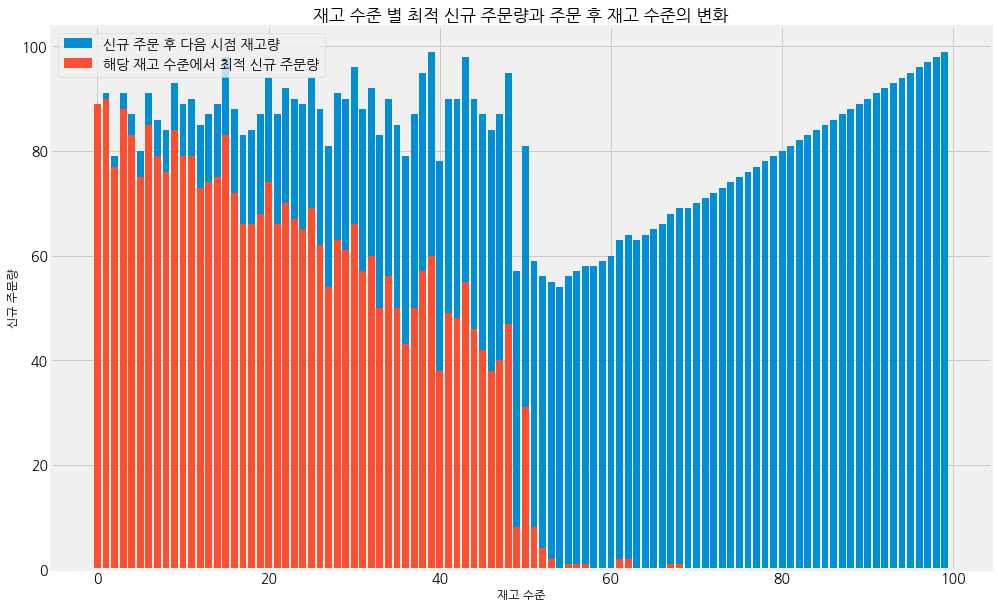

In [17]:
plt.rcParams["figure.figsize"] = (15, 10)

fig, ax = plt.subplots()
ax.bar(np.arange(100), inventory_status_list, label = '신규 주문 후 다음 시점 재고량')
ax.bar(np.arange(100), policy_list,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()
ax.set_title('재고 수준 별 최적 신규 주문량과 주문 후 재고 수준의 변화')


plt.show()

# 구간별 평균

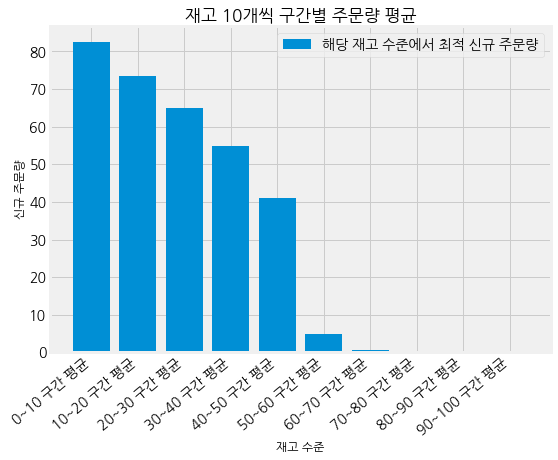

In [18]:
modified_policy01 = [np.mean(policy_list[i:i+10]) for i in range(0, 100, 10)]
range_list01 = ["{:2}~{:2} 구간 평균".format(i, i + 10) for i in range(0, 100, 10)]

plt.rcParams["figure.figsize"] = (8, 6)

fig, ax = plt.subplots()
ax.bar(range_list01, modified_policy01,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()
ax.set_title('재고 10개씩 구간별 주문량 평균')

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')


plt.show()


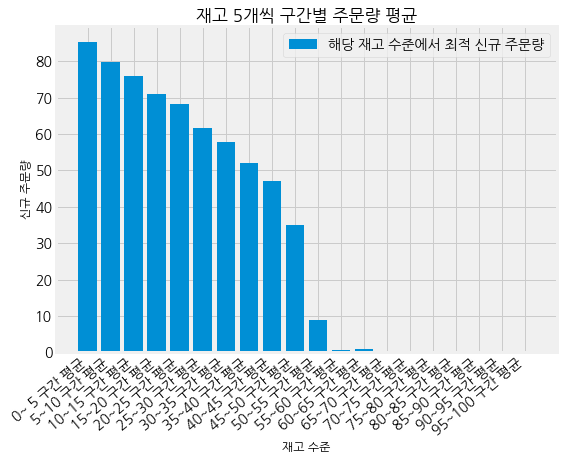

In [19]:
modified_policy02 = [np.mean(policy_list[i:i+5]) for i in range(0, 100, 5)]
range_list02 = ["{:2}~{:2} 구간 평균".format(i, i + 5) for i in range(0, 100, 5)]

plt.rcParams["figure.figsize"] = (8, 6)

fig, ax = plt.subplots()
ax.bar(range_list02, modified_policy02,label = '해당 재고 수준에서 최적 신규 주문량') # 신규 주문량
ax.set_xlabel('재고 수준')
ax.set_ylabel('신규 주문량')
ax.grid(True)
ax.legend()
ax.set_title('재고 5개씩 구간별 주문량 평균')

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment('right')


plt.show()


# [참고] 수요량 분포

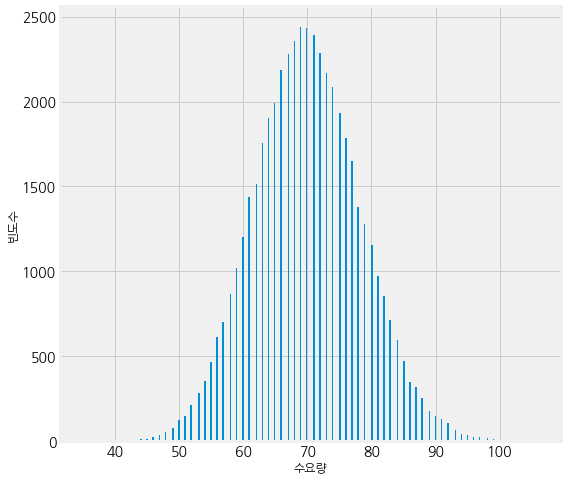

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)

fig, ax = plt.subplots()
ax.hist([np.random.poisson(70) for _ in range(50000)], bins=300)
ax.set_xlabel('수요량')
ax.set_ylabel('빈도수')

plt.show()